<a href="https://colab.research.google.com/github/soujanya-vattikolla/Machine-Learning-Tutorial/blob/main/GradientDescentandCostFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent:

It is an algorithm that finds the best fit line for given training data set.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def gradient_descent(x,y):
  m_current = b_current = 0
  iterations = 10
  n = len(x)
  learning_rate = 0.01 # we need to change the learning rate if required, to reach the global minima

  for i in range(iterations):
      y_predicted = m_current*x + b_current  #y=mx+b
      cost = (1/n) * sum([val**2 for val in (y-y_predicted)]) # cost is the mse
      m_deriative = -(2/n)*sum(x*(y-y_predicted))
      b_deriative = -(2/n)*sum(y-y_predicted)
      m_current = m_current-learning_rate*m_deriative
      b_current = b_current-learning_rate*b_deriative

      print("m_current{}, b_current{},cost{}, iteration{}".format(m_current,b_current,cost,i))

In [46]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

In [47]:
gradient_descent(x,y)

m_current0.62, b_current0.18,cost89.0, iteration0
m_current1.0928, b_current0.3192,cost52.25039999999999, iteration1
m_current1.453232, b_current0.42724799999999996,cost30.831949440000002, iteration2
m_current1.7278860800000002, b_current0.5115091199999999,cost18.347751350784, iteration3
m_current1.9370605952000002, b_current0.5776057727999999,cost11.070010749324897, iteration4
m_current2.096250917888, b_current0.6298300216319999,cost6.826353152519786, iteration5
m_current2.2172859146547204, b_current0.6714583661260799,cost4.350826141683065, iteration6
m_current2.309195511463117, b_current0.7049920439242751,cost2.9056952040975976, iteration7
m_current2.3788729763057748, b_current0.7323404723580026,cost2.0610450731046615, iteration8
m_current2.431580493177024, b_current0.7549612843324961,cost1.5663423003130599, iteration9


In [48]:
# to visualize 
%matplotlib inline
def gradient_descent(x,y):
  m_current = b_current = 0
  iterations = 10
  n = len(x)
  learning_rate = 0.01 # we need to change the learning rate if required, to reach the global minima
  plt.scatter(x,y,color='red',marker='+',linewidth='5')

  for i in range(iterations):
      y_predicted = m_current*x + b_current  #y=mx+b

      plt.plot(x,y_predicted,color='green')

      cost = (1/n) * sum([val**2 for val in (y-y_predicted)]) # cost is the mse
      m_deriative = -(2/n)*sum(x*(y-y_predicted))
      b_deriative = -(2/n)*sum(y-y_predicted)
      m_current = m_current-learning_rate*m_deriative
      b_current = b_current-learning_rate*b_deriative

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

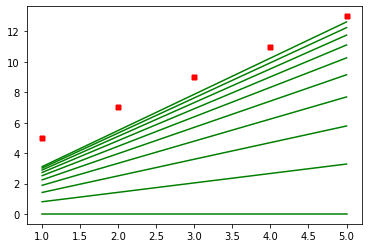

In [49]:
gradient_descent(x,y)

We can observe that slowly the points are reaching to the actual y values.

Excercise

In [64]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

In [56]:
student_df = pd.read_csv('test_scores.csv')
student_df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [57]:
def predict_sklearn():
  student_df = pd.read_csv('test_scores.csv')
  reg = LinearRegression()
  reg.fit(student_df[['math']],student_df['cs'])
  return reg.coef_,reg.intercept_

In [66]:
def student_gradient(x,y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.001

    cost_prev = 0

    for i in range(iterations):
        y_pred = m_curr*x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_pred)])
        m_der = -(2/n)*sum(x*(y-y_pred))
        b_der = -(2/n)*sum(y-y_pred)
        m_curr = m_curr-learning_rate*m_der
        b_curr = b_curr-learning_rate*b_der
        if math.isclose(cost, cost_prev, rel_tol=1e-20): # 1e-20 is the threshold and math.isclose is used to check when the costs are similar with 1e-20 threshold
             break
        cost_prev = cost

        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr,b_curr


if  __name__ == "__main__":
    student_df = pd.read_csv('test_scores.csv')
    x = np.array(student_df.math)
    y = np.array(student_df.cs)


    m, b = student_gradient(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_sklearn()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

m 9.891800000000002, b 0.1398, cost 5199.1, iteration 0
m -73.89063968000005, b -1.0422240800000002, cost 370727.6662565042, iteration 1
m 635.7369779473285, b 8.971449829408007, cost 26593365.21283422, iteration 2
m -5374.727514955187, b -75.84115332401389, cost 1907777992.8722565, iteration 3
m 45533.21677472461, b 642.5139249806472, cost 136861998255.80414, iteration 4
m -385651.2277087454, b -5441.869063972523, cost 9818336798225.717, iteration 5
m 3266431.5217446033, b 46092.15849604381, cost 704357226503460.2, iteration 6
m -27666290.14670837, b -390395.13732602727, cost 5.052985171774353e+16, iteration 7
m 234330311.64447328, b 3306602.156348863, cost 3.6249587830483005e+18, iteration 8
m -1984750831.161688, b -28006540.543865472, cost 2.6005075677245276e+20, iteration 9
Using gradient descent function: Coef -1984750831.161688 Intercept -28006540.543865472
Using sklearn: Coef [1.01773624] Intercept 1.9152193111569034
